<a href="https://colab.research.google.com/github/dweinflash/RNN/blob/master/Prog2_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.preprocessing import sequence

Create and investigate a SimpleRNN. 
The model stacks several recurrent layers one after the other in order to increase the representational power of the network. All intermediate layers return a full sequence of successive outputs for each timestamp. The final layer returns the output at the last timestamp (contains info of all timestamps from 0 to t).

In [ ]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
________________________________________________

Apply the SimpleRNN model to classify IMDB movie reviews as positive (1) or negative (0).

In [ ]:
from keras.datasets import imdb

Include only the top 10,000 most frequently occuring words in the reviews.

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [ ]:
train_data.shape

(25000,)

Investigate the data by decode the first review back to English words:

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

train_labels and test_labels are lists of 0s and 1s indicating which reviews are positive (1) and which are negative (0). The labels are scalars.

In [ ]:
print(train_labels[0])

1


train_data and test_data are lists of reviews; each review is a list of word indices (specifies which word, lower the index higher the frequency)

In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Transforms data into a 2D Numpy array of shape (10000, 500).
Consider 10,000 features, each feature up to 500 of the most common words.

In [ ]:
train_data = sequence.pad_sequences(train_data, maxlen=500)
test_data = sequence.pad_sequences(test_data, maxlen=500)

Train the model with Embedding and SimpleRNN layers.

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 132s 7ms/step - loss: 0.6830 - acc: 0.5517 - val_loss: 0.6264 - val_acc: 0.6580
Epoch 2/10
20000/20000 [==============================] - 131s 7ms/step - loss: 0.4626 - acc: 0.7853 - val_loss: 0.5284 - val_acc: 0.7160
Epoch 3/10
20000/20000 [==============================] - 130s 6ms/step - loss: 0.3313 - acc: 0.8641 - val_loss: 0.5242 - val_acc: 0.7914
Epoch 4/10
20000/20000 [==============================] - 129s 6ms/step - loss: 0.2523 - acc: 0.9016 - val_loss: 0.4199 - val_acc: 0.8162
Epoch 5/10
20000/20000 [==============================] - 129s 6ms/step - loss: 0.1784 - acc: 0.9375 - val_loss: 0.4543 - val_acc: 0.8360
Epoch 6/10
20000/20000 [==============================] - 128s 6ms/step - loss: 0.1092 - acc: 0.9624 - val_loss: 0.9958 - val_acc: 0.7638
Epoch 7/10
20000/20000 [==============================] - 128s 6ms/step - loss: 0.0685 - acc: 0.9783 - val_loss: 0.6217 - v

Display the training and validation loss accuracy.

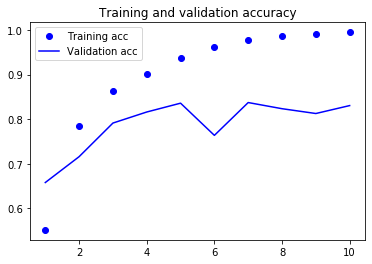

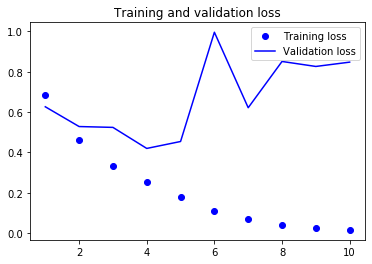

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Unfortunately, the recurrent network does not perform well - it achieves a maximum validation accuracy of only 83.74% during the 7th epoch. It seems the SimpleRNN model is too simplistic to be of real use. Indeed, the SimpleRNN network has a major issue: it is unable to maintain and learn long-term dependencies. In other words, the SimpleRNN suffers from the vanishing gradient problem, where the network becomes increasingly untrainable as layers are added to the network. 